In [1]:
from Population import Population
from fitnessFunc import *
import copy
import math
from operator import attrgetter
from Individual import *

In [2]:
# Set Parameters
randomSeed = 1234
problemType = "Problem1"
mode = 'MIN'
minLimit = -5.12
maxLimit = 5.12
crossoverFraction = 0.6
populationSize    = 10
sequenceLength    = 11 
numOfGenerations  = 1000

#PROBLEM1
interactionEnergyMatrix = [[10,4,1],[4,10,5],[1,5,10]]
selfEnergyVector  = [1,2,3]
numParticleType   = 3

#Pick fitness function
if problemType == "Problem1":
    fitnessFunction = CalulateEnergy
else:
    fitnessFunction = N_Dimensional_Rastrigin

#start random number generators
uniprng=Random()
uniprng.seed(randomSeed)
normprng=Random()
normprng.seed(randomSeed+101)
#set static params on classes
Individual.problemType = problemType
Individual.minLimit=minLimit
Individual.maxLimit=maxLimit
Individual.fitFunc= fitnessFunction
Individual.uniprng=uniprng
Individual.normprng=normprng

Population.problemType= problemType
Population.mode       = mode
Population.uniprng=uniprng
Population.crossoverFraction = crossoverFraction
Population.numParticleType  = numParticleType
Population.fitFunc= fitnessFunction

#For Problem1
Population.interactionEnergyMatrix = interactionEnergyMatrix
Population.selfEnergyVector = selfEnergyVector

#create initial Population (random initialization)
population=Population(populationSize = populationSize,
                      sequenceLength = sequenceLength)

In [3]:
population.print_info()

--------------------------------[INFO]---------------------------------------------------
MODE:               MIN
ProblemType:        Problem1
Population Size:    10
CrossOverFraction:  0.6
--------------------------------
Fitness Function:
 <bound method CalulateEnergy of <Population.Population object at 0x0000026E03CBB5B0>>
Interaction Matrix:
[[10, 4, 1], [4, 10, 5], [1, 5, 10]]
SelfEnergyVector:
[1, 2, 3]
NumOfParticles: 3
---------------------------------
SequenceLength:
 11
----------------------------------
Population:

[1, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1]
[0, 0, 1, 2, 2, 1, 2, 1, 0, 0, 0]
[0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2]
[2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0]
[0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2]
[1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0]
[1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2]
[0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1]
[1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 1]
[0, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2]
---------------------------------
Average Fitness Of population:
 None
bestFitness:
None
bestIndividual:
None


# Test Funcnality

In [4]:
#create initial offspring population by copying parent pop
offspring=population.copy()

offspring.print_info()

--------------------------------[INFO]---------------------------------------------------
MODE:               MIN
ProblemType:        Problem1
Population Size:    10
CrossOverFraction:  0.6
--------------------------------
Fitness Function:
 <bound method CalulateEnergy of <Population.Population object at 0x0000026E03CBB820>>
Interaction Matrix:
[[10, 4, 1], [4, 10, 5], [1, 5, 10]]
SelfEnergyVector:
[1, 2, 3]
NumOfParticles: 3
---------------------------------
SequenceLength:
 11
----------------------------------
Population:

[1, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1]
[0, 0, 1, 2, 2, 1, 2, 1, 0, 0, 0]
[0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2]
[2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0]
[0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2]
[1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0]
[1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2]
[0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1]
[1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 1]
[0, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2]
---------------------------------
Average Fitness Of population:
 None
bestFitness:
None
bestIndividual:
None


In [5]:
#select mating pool
offspring.conductTournament()

offspring.print_info()

--------------------------------[INFO]---------------------------------------------------
MODE:               MIN
ProblemType:        Problem1
Population Size:    10
CrossOverFraction:  0.6
--------------------------------
Fitness Function:
 <bound method CalulateEnergy of <Population.Population object at 0x0000026E03CBB820>>
Interaction Matrix:
[[10, 4, 1], [4, 10, 5], [1, 5, 10]]
SelfEnergyVector:
[1, 2, 3]
NumOfParticles: 3
---------------------------------
SequenceLength:
 11
----------------------------------
Population:

[1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2]
[0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2]
[0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1]
[2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0]
[0, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2]
[0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2]
[0, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2]
[0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2]
[0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2]
[1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2]
---------------------------------
Average Fitness Of population:
 None
bestFitness:
None
bestIndividual:
None


In [6]:
#perform crossover
offspring.crossover()

offspring.print_info()

--------------------------------[INFO]---------------------------------------------------
MODE:               MIN
ProblemType:        Problem1
Population Size:    10
CrossOverFraction:  0.6
--------------------------------
Fitness Function:
 <bound method CalulateEnergy of <Population.Population object at 0x0000026E03CBB820>>
Interaction Matrix:
[[10, 4, 1], [4, 10, 5], [1, 5, 10]]
SelfEnergyVector:
[1, 2, 3]
NumOfParticles: 3
---------------------------------
SequenceLength:
 11
----------------------------------
Population:

[1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2]
[0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2]
[0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1]
[2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0]
[0, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2]
[0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2]
[0, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2]
[0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2]
[0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2]
[1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2]
---------------------------------
Average Fitness Of population:
 None
bestFitness:
None
bestIndividual:
None


In [7]:
#random mutation
offspring.mutate()
offspring.print_info()

--------------------------------[INFO]---------------------------------------------------
MODE:               MIN
ProblemType:        Problem1
Population Size:    10
CrossOverFraction:  0.6
--------------------------------
Fitness Function:
 <bound method CalulateEnergy of <Population.Population object at 0x0000026E03CBB820>>
Interaction Matrix:
[[10, 4, 1], [4, 10, 5], [1, 5, 10]]
SelfEnergyVector:
[1, 2, 3]
NumOfParticles: 3
---------------------------------
SequenceLength:
 11
----------------------------------
Population:

[2, 1, 1, 0, 2, 1, 1, 0, 1, 2, 2]
[2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2]
[0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0]
[0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2]
[1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2]
[2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0]
[0, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0]
[1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1]
[2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0]
[2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 1]
---------------------------------
Average Fitness Of population:
 None
bestFitness:
None
bestIndividual:
None


In [8]:
#update fitness values
offspring.evaluateFitness()
offspring.print_info()

--------------------------------[INFO]---------------------------------------------------
MODE:               MIN
ProblemType:        Problem1
Population Size:    10
CrossOverFraction:  0.6
--------------------------------
Fitness Function:
 <bound method CalulateEnergy of <Population.Population object at 0x0000026E03CBB820>>
Interaction Matrix:
[[10, 4, 1], [4, 10, 5], [1, 5, 10]]
SelfEnergyVector:
[1, 2, 3]
NumOfParticles: 3
---------------------------------
SequenceLength:
 11
----------------------------------
Population:

[2, 1, 1, 0, 2, 1, 1, 0, 1, 2, 2]
[2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2]
[0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0]
[0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2]
[1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2]
[2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0]
[0, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0]
[1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1]
[2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0]
[2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 1]
---------------------------------
Average Fitness Of population:
 135.0
bestFitness:
90
bestIndividual:
[2, 1, 2, 1, 0, 2, 1, 2

In [9]:
#survivor selection: elitist truncation using parents+offspring
population.combinePops(offspring)
population.truncateSelect(populationSize)
population.evaluateFitness()
population.print_info()

--------------------------------[INFO]---------------------------------------------------
MODE:               MIN
ProblemType:        Problem1
Population Size:    10
CrossOverFraction:  0.6
--------------------------------
Fitness Function:
 <bound method CalulateEnergy of <Population.Population object at 0x0000026E03CBB5B0>>
Interaction Matrix:
[[10, 4, 1], [4, 10, 5], [1, 5, 10]]
SelfEnergyVector:
[1, 2, 3]
NumOfParticles: 3
---------------------------------
SequenceLength:
 11
----------------------------------
Population:

[2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0]
[0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2]
[0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2]
[1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2]
[0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1]
[0, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2]
[1, 0, 0, 0, 2, 0, 2, 2, 0, 0, 1]
[2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0]
[0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2]
[1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0]
---------------------------------
Average Fitness Of population:
 114.6
bestFitness:
90
bestIndividual:
[2, 1, 2, 1, 0, 2, 1, 2

In [10]:
from torch import i0_


generationCountList = []
bestFitnessList = []
generationNeeded = 0
for i in range(numOfGenerations):
    if population.bestFitness == 41: 
        generationNeeded = i
        break
    offspring=population.copy()
    offspring.mutate()

    offspring.evaluateFitness()
    offspring.conductTournament()

    #survivor selection: elitist truncation using parents+offspring
    population.combinePops(offspring)
    population.truncateSelect(populationSize)
    population.evaluateFitness()
    
    generationCountList.append(i)
    bestFitnessList.append(population.bestFitness)
    
    

In [11]:
population.print_info()

--------------------------------[INFO]---------------------------------------------------
MODE:               MIN
ProblemType:        Problem1
Population Size:    10
CrossOverFraction:  0.6
--------------------------------
Fitness Function:
 <bound method CalulateEnergy of <Population.Population object at 0x0000026E03CBB5B0>>
Interaction Matrix:
[[10, 4, 1], [4, 10, 5], [1, 5, 10]]
SelfEnergyVector:
[1, 2, 3]
NumOfParticles: 3
---------------------------------
SequenceLength:
 11
----------------------------------
Population:

[0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0]
[0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0]
[2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0]
[2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0]
[0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0]
[0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0]
[2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0]
[2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0]
[0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2]
[0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2]
---------------------------------
Average Fitness Of population:
 54.6
bestFitness:
41
bestIndividual:
[0, 2, 0, 2, 0, 2, 0, 2,

In [12]:
import matplotlib.pyplot as plt

def plot_graph(data,generationCount,title):
    plt.title(title)
    plt.plot(generationCount,data)
    plt.show()

--------------------------------[INFO]---------------------------------------------------
MODE:               MIN
ProblemType:        Problem1
Population Size:    10
CrossOverFraction:  0.6
--------------------------------
Fitness Function:
 <bound method CalulateEnergy of <Population.Population object at 0x0000026E03CBB5B0>>
Interaction Matrix:
[[10, 4, 1], [4, 10, 5], [1, 5, 10]]
SelfEnergyVector:
[1, 2, 3]
NumOfParticles: 3
---------------------------------
SequenceLength:
 11
----------------------------------
Population:

[0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0]
[0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0]
[2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0]
[2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0]
[0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0]
[0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0]
[2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0]
[2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0]
[0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2]
[0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2]
---------------------------------
Average Fitness Of population:
 54.6
bestFitness:
41
bestIndividual:
[0, 2, 0, 2, 0, 2, 0, 2,

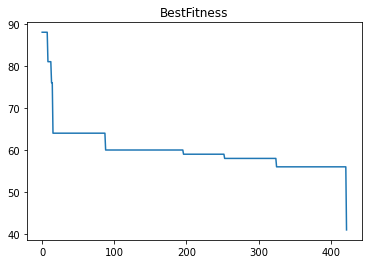

Best Fitness is : 41
Generation Needed: 423


In [14]:
population.print_info()
plot_graph(generationCount = generationCountList,data = bestFitnessList,title = 'BestFitness')
print(f"Best Fitness is : {population.bestFitness}")
print(f"Generation Needed: {generationNeeded}")